In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
BATCH_SIZE = 128
IMAGE_SIZE = 256
CHANNELS=3

In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)


Found 15048 files belonging to 11 classes.


In [5]:
class_name = dataset.class_names
class_name

['Random Images',
 'Tomato_Bacterial_Spot',
 'Tomato_Early_Blight',
 'Tomato_Late_Blight',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato_YellowLeaf__Curl_Virus',
 'Tomato_healthy',
 'Tomato_leaf_mold',
 'Tomato_mosaic_virus',
 'Tomato_target_spot']

AxesImage(shape=(256, 256, 3))
Text(0.5, 1.0, 'Tomato_target_spot')


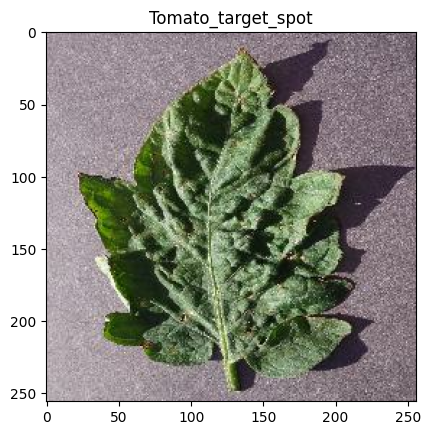

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(plt.imshow(image_batch[0].numpy().astype('uint8')))
    print(plt.title(class_name[label_batch[0].numpy()]))

In [7]:
def get_dataset_partition_tf(ds, train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size = len(ds)

    if shuffle:
        ds= ds.shuffle(shuffle_size,seed=12)

    
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds,val_ds,test_ds

In [8]:
train_ds,val_ds,test_ds = get_dataset_partition_tf(dataset)

In [9]:
len(train_ds)

94

In [10]:
len(val_ds)

11

In [11]:
len(test_ds)

13

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [13]:
from tensorflow.keras.layers import Resizing,Rescaling
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.Rescaling(1./255),
])

In [14]:
from tensorflow.keras.models import Sequential
data_augmentation = Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

In [15]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 11

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

C:\Users\vhsar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [17]:
model.fit(train_ds,
          epochs=10,
          batch_size = BATCH_SIZE,
          verbose=1,
          validation_data=val_ds
         )

Epoch 1/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 303s 3s/step - accuracy: 0.1940 - loss: 2.2365 - val_accuracy: 0.3928 - val_loss: 1.7168
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - accuracy: 0.4468 - loss: 1.6424 - val_accuracy: 0.5582 - val_loss: 1.2797
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.6131 - loss: 1.1691 - val_accuracy: 0.5923 - val_loss: 1.2132
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.6884 - loss: 0.9109 - val_accuracy: 0.5916 - val_loss: 1.2465
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.7494 - loss: 0.7159 - val_accuracy: 0.5866 - val_loss: 1.4445
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.7621 - loss: 0.6740 - val_accuracy: 0.5490 - val_loss: 1.9625
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.8006 - loss: 0.5678 - val_accuracy: 0.6868 - val_loss: 1.0967
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.8281 - loss: 0.4906 - val_accuracy: 0.7244 - v

In [18]:
model.evaluate(test_ds)

13/13 ━━━━━━━━━━━━━━━━━━━━ 41s 826ms/step - accuracy: 0.7577 - loss: 0.7485


[0.7919565439224243, 0.7524038553237915]

In [19]:

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


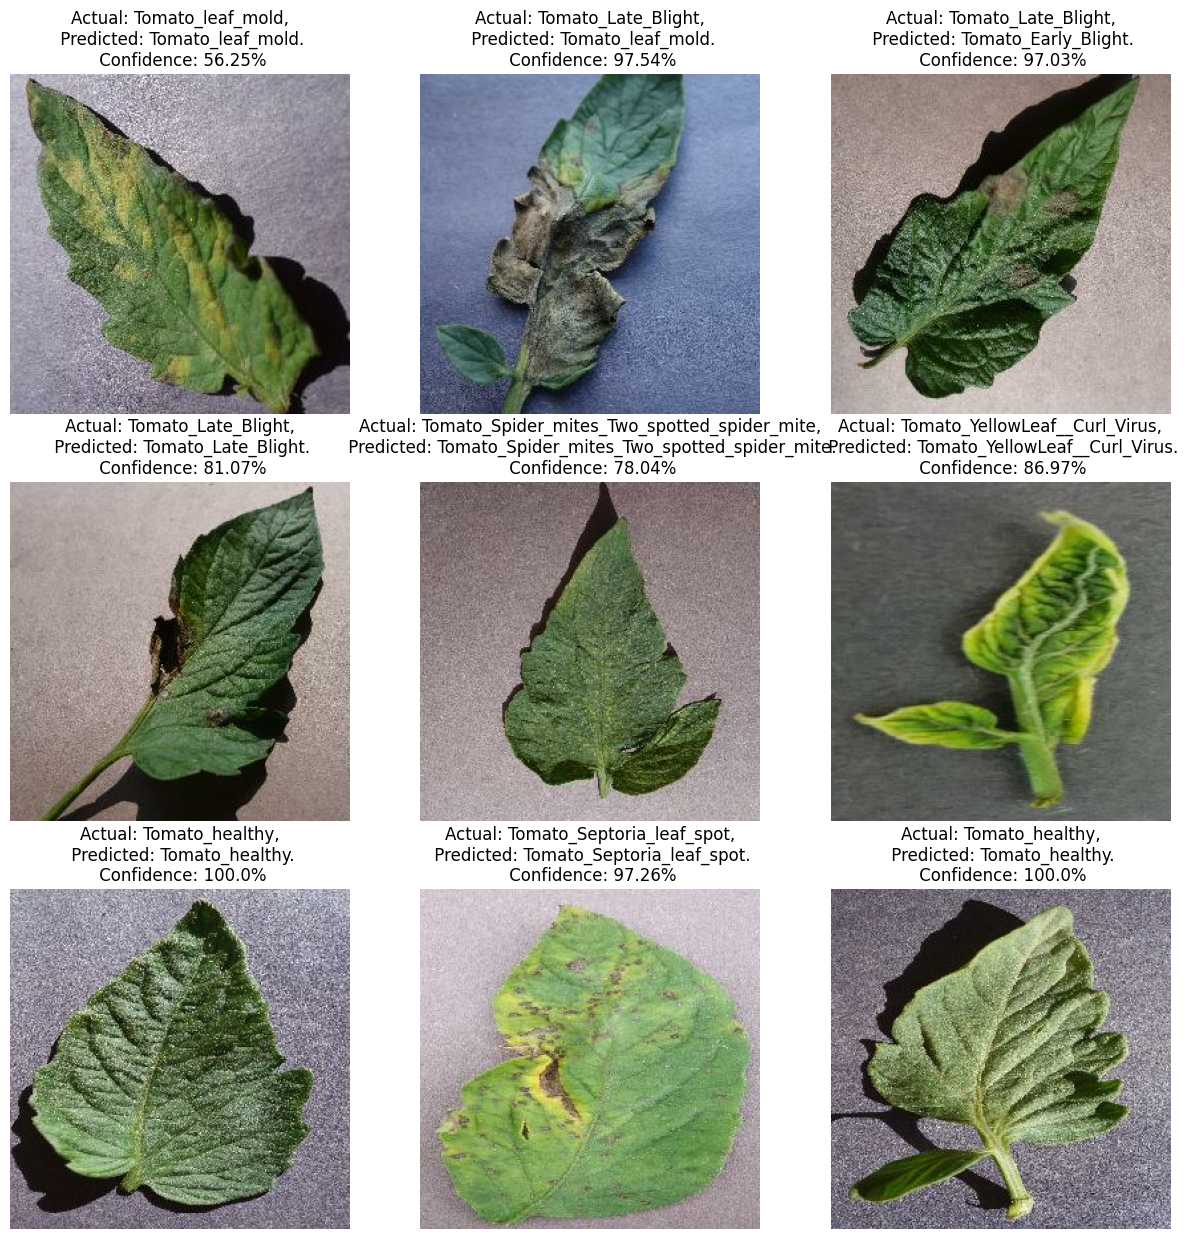

In [20]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [21]:
model_version=1
model.save(f"../pepper disease/{model_version}.keras")